In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from sklearn.impute import KNNImputer

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from functools import reduce

In [2]:
#membaca data
tj_train = pd.read_csv('C:/Users/febsu/OneDrive/Desktop/febs/indathon/training_jumlah_penumpang_tj.csv', sep =';')
tj_armada = pd.read_csv('C:/Users/febsu/OneDrive/Desktop/febs/indathon/jumlah_armada_tj.csv', sep =';')
lrt_numpang = pd.read_csv('C:/Users/febsu/OneDrive/Desktop/febs/indathon/jumlah_penumpang_lrt.csv', sep =';')
mrt_numpang = pd.read_csv('C:/Users/febsu/OneDrive/Desktop/febs/indathon/jumlah_penumpang_mrt.csv', sep =';')
lrt_perjalanan = pd.read_csv('C:/Users/febsu/OneDrive/Desktop/febs/indathon/jumlah_perjalanan_lrt.csv', sep =';')
mrt_perjalanan = pd.read_csv('C:/Users/febsu/OneDrive/Desktop/febs/indathon/jumlah_perjalanan_mrt.csv', sep =';')
data_tambahan = pd.read_excel(r'C:\Users\febsu\OneDrive\Desktop\febs\indathon\data_tambahan.xlsx')

In [3]:
tj_train['period'] = pd.to_datetime(dict(year=tj_train['tahun'], month=tj_train['bulan'], day=1)) + pd.offsets.MonthEnd(0)
tj_train= tj_train.drop(['bulan','tahun'], axis =1)
tj_armada['period'] = pd.to_datetime(dict(year=tj_armada['tahun'], month=tj_armada['bulan'], day=1)) + pd.offsets.MonthEnd(0)
tj_armada= tj_armada.drop(['bulan','tahun'], axis =1)
lrt_numpang['period'] = pd.to_datetime(dict(year=lrt_numpang['tahun'], month=lrt_numpang['bulan'], day=1)) + pd.offsets.MonthEnd(0)
lrt_numpang= lrt_numpang.drop(['bulan','tahun'], axis =1)
mrt_numpang['period'] = pd.to_datetime(dict(year=mrt_numpang['tahun'], month=mrt_numpang['bulan'], day=1)) + pd.offsets.MonthEnd(0)
mrt_numpang= mrt_numpang.drop(['bulan','tahun'], axis =1)
lrt_perjalanan['period'] = pd.to_datetime(dict(year=lrt_perjalanan['tahun'], month=lrt_perjalanan['bulan'], day=1)) + pd.offsets.MonthEnd(0)
lrt_perjalanan= lrt_perjalanan.drop(['bulan','tahun'], axis =1)
mrt_perjalanan['period'] = pd.to_datetime(dict(year=mrt_perjalanan['tahun'], month=mrt_perjalanan['bulan'], day=1)) + pd.offsets.MonthEnd(0)
mrt_perjalanan= mrt_perjalanan.drop(['bulan','tahun'], axis =1)
data_tambahan['period'] = pd.to_datetime(dict(year=data_tambahan['tahun'], month=data_tambahan['bulan'], day=1)) + pd.offsets.MonthEnd(0)
data_tambahan= data_tambahan.drop(['bulan','tahun'], axis =1)

In [4]:
df = [tj_train, tj_armada, lrt_numpang, mrt_numpang, lrt_perjalanan, mrt_perjalanan, data_tambahan]

In [5]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['period'],
                                            how='outer'), df)

In [6]:
df.tail()

,jumlah_penumpang_x,period,jumlah_armada_tj,jumlah_penumpang_y,jumlah_penumpang,jumlah_perjalanan_x,jumlah_perjalanan_y,jumlah_penumpang_krl,curah_hujan,jumlah_penumpang_pesawat_domestik,jumlah_penumpang_pesawat_luar_negeri
109,NaN,2024-02-29,4456.0,89934.0,2595293.0,5916.0,7539.0,24617000.0,NaN,1346856.0,623149.0
110,NaN,2024-03-31,4451.0,92004.0,2876356.0,6321.0,7977.0,26012000.0,NaN,1362594.0,609907.0
111,NaN,2024-04-30,4457.0,84571.0,2607904.0,6120.0,7626.0,25543000.0,NaN,1606572.0,653900.0
112,NaN,2024-05-31,4409.0,96550.0,3175772.0,6324.0,7882.0,27057000.0,NaN,1560672.0,652622.0
113,NaN,2024-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2 = df.rename({'jumlah_penumpang_x': 'jumlah_penumpang_tj', 'jumlah_penumpang_y': 'jumlah_penumpang_lrt',
                 'jumlah_penumpang': 'jumlah_penumpang_mrt',
                'jumlah_perjalanan_x': 'jumlah_perjalanan_lrt', 'jumlah_perjalanan_y': 'jumlah_perjalanan_mrt'}, axis=1)

In [8]:
dff = df2.copy()

In [9]:
df2.drop(df2[ df2['period'] >= pd.Timestamp(2024,1,31) ].index, inplace=True)

In [10]:
df = df2.set_index('period')
df.index = pd.to_datetime(df.index)

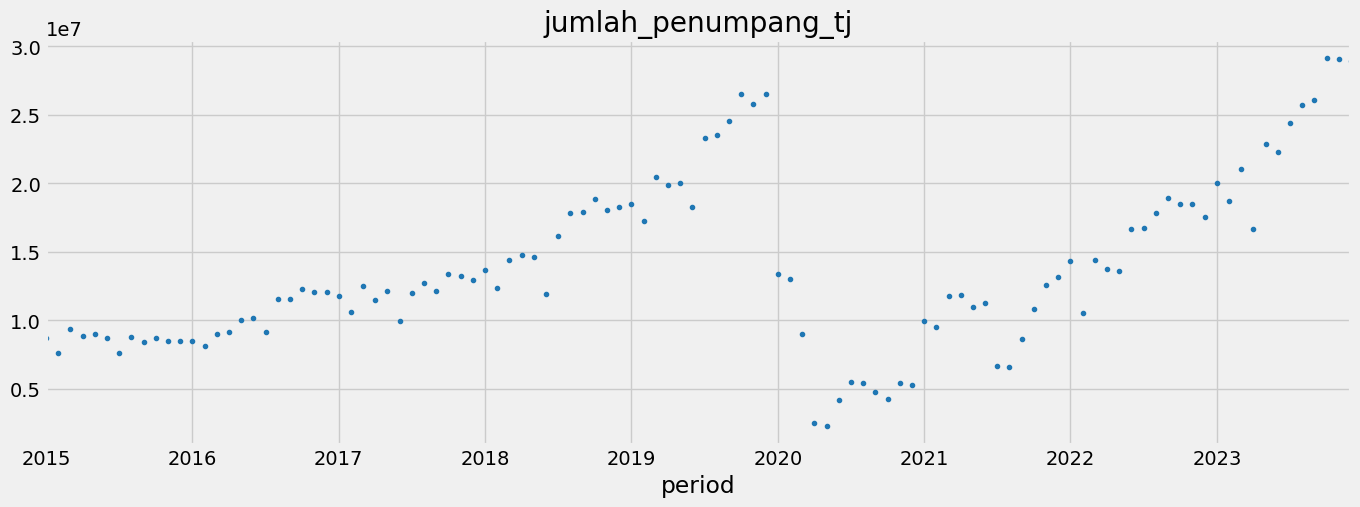

In [11]:
df['jumlah_penumpang_tj'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='jumlah_penumpang_tj')
plt.show()

# Reviewing: Train / Test Split

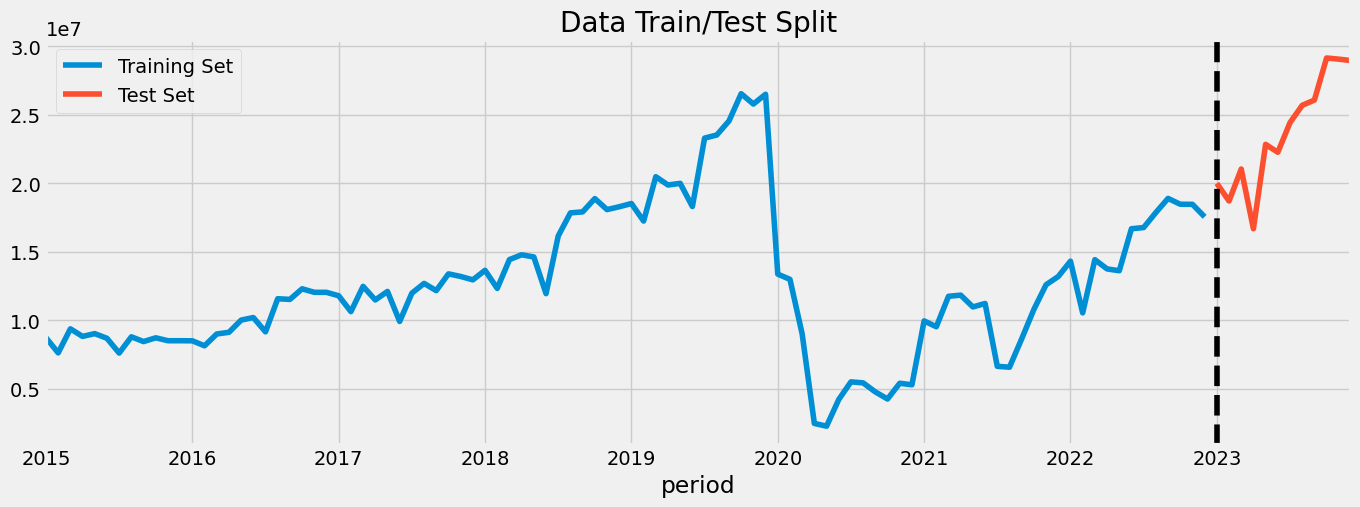

In [12]:
train = df.loc[df.index < '31-01-2023']
test = df.loc[df.index >= '31-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train['jumlah_penumpang_tj'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['jumlah_penumpang_tj'].plot(ax=ax, label='Test Set')
ax.axvline('31-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [13]:
train.shape,test.shape

((96, 10), (12, 10))

# Time Series Cross Validation

In [14]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2, test_size=12)
df = df.sort_index()

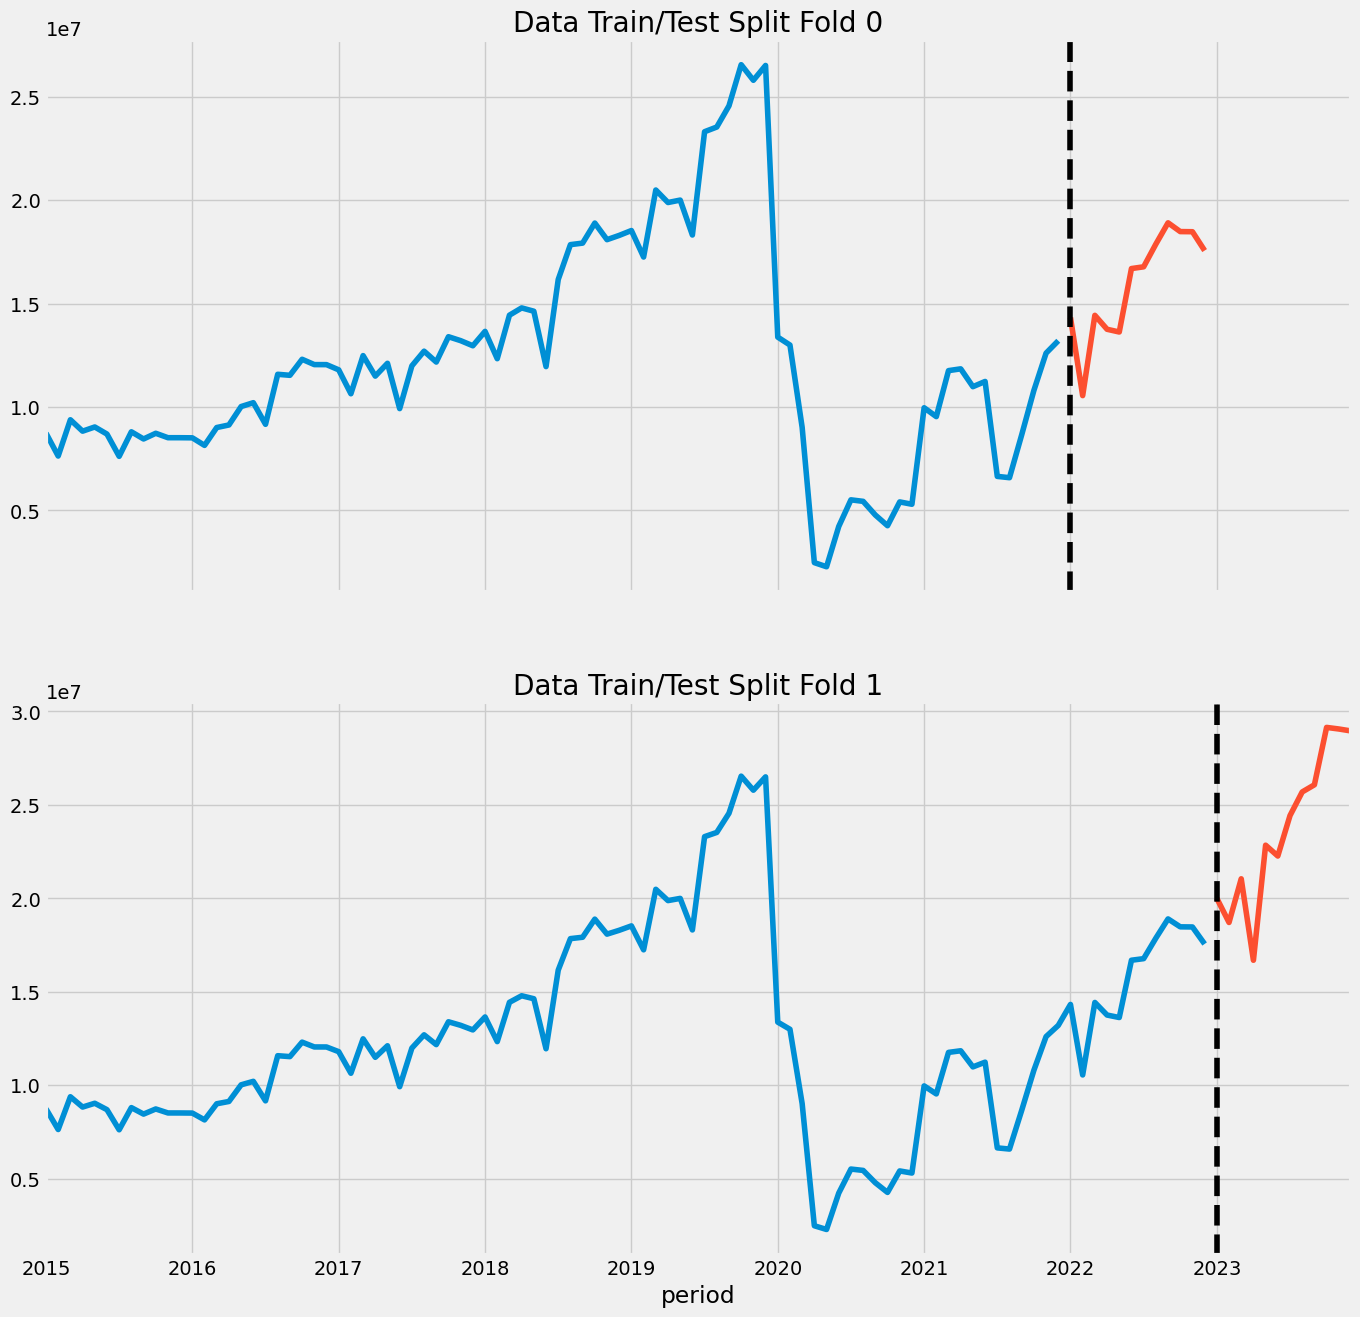

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['jumlah_penumpang_tj'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['jumlah_penumpang_tj'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

# Add Features Quarter, Month, Year, Week Of Year

In [16]:
def create_features(df):
   
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['weekofyear'] = df.index.isocalendar().week

    return df

df = create_features(df)

In [17]:
def create_features(df):

    return df

df = create_features(df)

# Lag Features

In [18]:
def add_lags(df):
    target_map = df['jumlah_penumpang_tj'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('91 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('182 days')).map(target_map)
    return df

In [19]:
df = add_lags(df)

# Train Using Cross Validation

In [20]:
%%time

tss = TimeSeriesSplit(n_splits=2, test_size=12)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)
  #'meanpressure',
    FEATURES = ['jumlah_armada_tj','jumlah_penumpang_lrt',
                'jumlah_penumpang_mrt','jumlah_perjalanan_lrt',
                'jumlah_perjalanan_mrt','quarter','month','year','weekofyear',
                'lag1','lag2','jumlah_penumpang_krl','curah_hujan','jumlah_penumpang_pesawat_domestik',
               'jumlah_penumpang_pesawat_luar_negeri']
    TARGET = 'jumlah_penumpang_tj'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor()
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)


[0]	validation_0-rmse:3993471.34872	validation_1-rmse:4408093.64281
[99]	validation_0-rmse:3292.27783	validation_1-rmse:4751236.74445
[0]	validation_0-rmse:3901681.82568	validation_1-rmse:10525306.23554
[99]	validation_0-rmse:2945.09797	validation_1-rmse:6871355.09739
CPU times: total: 1.31 s
Wall time: 1.18 s


In [21]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 5811296.1404
Fold scores:[4751236.7760409415, 6871355.5046956595]


# Predicting the Future

In [22]:
%%time

df = create_features(df)

FEATURES = ['jumlah_armada_tj','jumlah_penumpang_lrt',
                'jumlah_penumpang_mrt','jumlah_perjalanan_lrt',
                'jumlah_perjalanan_mrt','quarter','month','year','weekofyear',
                'lag1','lag2','jumlah_penumpang_krl','curah_hujan','jumlah_penumpang_pesawat_domestik',
           'jumlah_penumpang_pesawat_luar_negeri']
TARGET = 'jumlah_penumpang_tj'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor()
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:4616242.48534
[99]	validation_0-rmse:15302.26570
CPU times: total: 500 ms
Wall time: 97 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

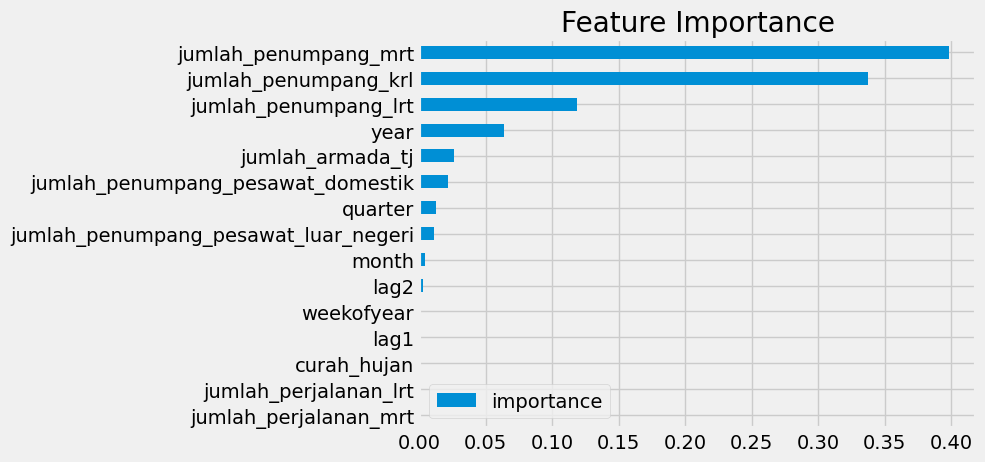

In [23]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [24]:
test['prediction'] = reg.predict(X_test)
test

C:\Users\febsu\AppData\Local\Temp\ipykernel_3088\2874089957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


,jumlah_penumpang_tj,jumlah_armada_tj,jumlah_penumpang_lrt,jumlah_penumpang_mrt,jumlah_perjalanan_lrt,jumlah_perjalanan_mrt,jumlah_penumpang_krl,curah_hujan,jumlah_penumpang_pesawat_domestik,jumlah_penumpang_pesawat_luar_negeri,quarter,month,year,weekofyear,lag1,lag2,prediction
period,,,,,,,,,,,,,,,,,
2023-01-31,20001303.0,3853.0,72424.0,2540315.0,6190.0,8035.0,22716957.0,268.2,1419611.0,469016.0,1,1,2023,5,NaN,NaN,20000156.0
2023-02-28,18710281.0,3864.0,76166.0,2378568.0,5980.0,7340.0,20810770.0,496.1,1295180.0,479400.0,1,2,2023,9,NaN,NaN,18710508.0
2023-03-31,21046680.0,3890.0,82754.0,2699585.0,6200.0,8035.0,23855703.0,246.7,1452671.0,537237.0,1,3,2023,13,NaN,18900000.0,21045798.0
2023-04-30,16686971.0,3853.0,72318.0,2065546.0,5998.0,7270.0,21401906.0,76.9,1490809.0,476397.0,2,4,2023,17,NaN,NaN,16684679.0
2023-05-31,22845144.0,3944.0,78639.0,2681876.0,6198.0,8161.0,23715677.0,117.7,1645124.0,535276.0,2,5,2023,22,NaN,18469000.0,22842412.0
2023-06-30,22264954.0,3980.0,84008.0,2709731.0,6098.0,7688.0,23292386.0,90.6,1608563.0,579430.0,2,6,2023,26,21046680.0,NaN,22264830.0
2023-07-31,24428349.0,4114.0,86574.0,2959449.0,6322.0,8109.0,25211050.0,11.7,1737637.0,531071.0,3,7,2023,31,NaN,NaN,24430504.0
2023-08-31,25693459.0,4090.0,87476.0,2999724.0,6322.0,8253.0,24978901.0,NaN,1525937.0,634105.0,3,8,2023,35,NaN,NaN,25690074.0
2023-09-30,26076085.0,4136.0,92718.0,3003191.0,6120.0,7909.0,25081976.0,2.7,1468845.0,619877.0,3,9,2023,39,NaN,NaN,26080966.0


In [25]:
test['error'] = np.abs(test['jumlah_penumpang_tj'] - test['prediction'])

C:\Users\febsu\AppData\Local\Temp\ipykernel_3088\3426119742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test['jumlah_penumpang_tj'] - test['prediction'])


In [26]:
test[['jumlah_penumpang_tj','prediction','error']].head()

,jumlah_penumpang_tj,prediction,error
period,,,
2023-01-31,20001303.0,20000156.0,1147.0
2023-02-28,18710281.0,18710508.0,227.0
2023-03-31,21046680.0,21045798.0,882.0
2023-04-30,16686971.0,16684679.0,2292.0
2023-05-31,22845144.0,22842412.0,2732.0


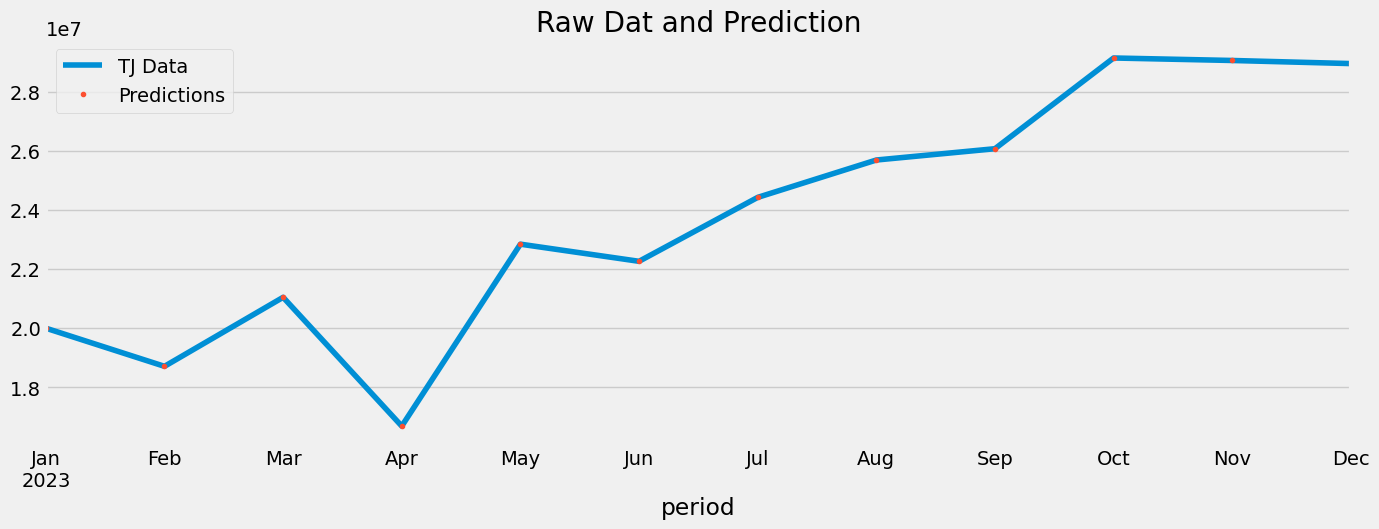

In [27]:
ax = test[['jumlah_penumpang_tj']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['TJ Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [28]:
dff.index.max()

113

In [29]:
dff.head()

,jumlah_penumpang_tj,period,jumlah_armada_tj,jumlah_penumpang_lrt,jumlah_penumpang_mrt,jumlah_perjalanan_lrt,jumlah_perjalanan_mrt,jumlah_penumpang_krl,curah_hujan,jumlah_penumpang_pesawat_domestik,jumlah_penumpang_pesawat_luar_negeri
0,8738599.0,2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7630313.0,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9383835.0,2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8832441.0,2015-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9035420.0,2015-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
dff = dff.set_index('period')
dff.index = pd.to_datetime(dff.index, format='%Y-%m-%d')

In [31]:
future = pd.date_range('2023-01-31','2024-06-30', freq='M')

In [32]:
dff = dff.reindex(future).fillna(0)

In [33]:
dfa = dff.copy()

In [34]:
dfb = dff.drop(['jumlah_penumpang_tj'], axis =1)

In [35]:
dfb.replace(0, np.nan, inplace=True)

# Imputation Using KNN Imputer For Missing Values Features

In [36]:
%%time

knn = KNNImputer(n_neighbors=2)
imputed=knn.fit_transform(dfb)
imputed

CPU times: total: 0 ns
Wall time: 6.91 ms


array([[3.85300000e+03, 7.24240000e+04, 2.54031500e+06, 6.19000000e+03,
        8.03500000e+03, 2.27169570e+07, 2.68200000e+02, 1.41961100e+06,
        4.69016000e+05],
       [3.86400000e+03, 7.61660000e+04, 2.37856800e+06, 5.98000000e+03,
        7.34000000e+03, 2.08107700e+07, 4.96100000e+02, 1.29518000e+06,
        4.79400000e+05],
       [3.89000000e+03, 8.27540000e+04, 2.69958500e+06, 6.20000000e+03,
        8.03500000e+03, 2.38557030e+07, 2.46700000e+02, 1.45267100e+06,
        5.37237000e+05],
       [3.85300000e+03, 7.23180000e+04, 2.06554600e+06, 5.99800000e+03,
        7.27000000e+03, 2.14019060e+07, 7.69000000e+01, 1.49080900e+06,
        4.76397000e+05],
       [3.94400000e+03, 7.86390000e+04, 2.68187600e+06, 6.19800000e+03,
        8.16100000e+03, 2.37156770e+07, 1.17700000e+02, 1.64512400e+06,
        5.35276000e+05],
       [3.98000000e+03, 8.40080000e+04, 2.70973100e+06, 6.09800000e+03,
        7.68800000e+03, 2.32923860e+07, 9.06000000e+01, 1.60856300e+06,
        5.7

In [37]:
dfb= pd.DataFrame(imputed, columns=dfb.columns)

In [38]:
dff['jumlah_armada_tj'] = imputed[:,0]
dff['jumlah_penumpang_lrt'] = imputed[:,1]
dff['jumlah_penumpang_mrt'] = imputed[:,2]
dff['jumlah_perjalanan_lrt'] = imputed[:,3]
dff['jumlah_perjalanan_mrt'] = imputed[:,4]
dff['jumlah_penumpang_krl'] = imputed[:,5]
dff['curah_hujan'] = imputed[:,6]
dff['jumlah_penumpang_pesawat_domestik'] = imputed[:,7]
dff['jumlah_penumpang_pesawat_luar_negeri'] = imputed[:,8]

In [39]:
def create_features(dff):
  
    dff = dff.copy()
    dff['quarter'] = dff.index.quarter
    dff['month'] = dff.index.month
    dff['year'] = dff.index.year
    dff['weekofyear'] = dff.index.isocalendar().week
    
    return dff

dff = create_features(dff)

In [40]:
def add_lags(dff):
    target_map = dff['jumlah_penumpang_tj'].to_dict()
    dff['lag1'] = (dff.index - pd.Timedelta('91 days')).map(target_map)
    dff['lag2'] = (dff.index - pd.Timedelta('182 days')).map(target_map)
    return dff

In [41]:
dff = add_lags(dff)

In [42]:
dff.index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[ns]', freq='M')

In [43]:
%%time

dff['jumlah_penumpang_tj'] = reg.predict(dff[FEATURES])

CPU times: total: 0 ns
Wall time: 6.68 ms


# Save Data

In [44]:
dff= pd.DataFrame(dff)

In [45]:
dff.tail()

,jumlah_penumpang_tj,jumlah_armada_tj,jumlah_penumpang_lrt,jumlah_penumpang_mrt,jumlah_perjalanan_lrt,jumlah_perjalanan_mrt,jumlah_penumpang_krl,curah_hujan,jumlah_penumpang_pesawat_domestik,jumlah_penumpang_pesawat_luar_negeri,quarter,month,year,weekofyear,lag1,lag2
2024-02-29,29214816.0,4456.000000,89934.000000,2.595293e+06,5916.000000,7539.000000,2.461700e+07,124.700000,1.346856e+06,623149.000000,1,2,2024,9,29062581.0,25693459.0
2024-03-31,29185466.0,4451.000000,92004.000000,2.876356e+06,6321.000000,7977.000000,2.601200e+07,4546.050000,1.362594e+06,609907.000000,1,3,2024,13,28957580.0,NaN
2024-04-30,27167174.0,4457.000000,84571.000000,2.607904e+06,6120.000000,7626.000000,2.554300e+07,7.200000,1.606572e+06,653900.000000,2,4,2024,18,NaN,29146729.0
2024-05-31,28654396.0,4409.000000,96550.000000,3.175772e+06,6324.000000,7882.000000,2.705700e+07,4447.500000,1.560672e+06,652622.000000,2,5,2024,22,NaN,NaN
2024-06-30,25119240.0,4169.294118,86623.823529,2.808654e+06,6189.235294,7920.411765,2.476280e+07,946.336364,1.517217e+06,586640.470588,2,6,2024,26,0.0,28957580.0


In [46]:
dff.index.names = ['ds']

In [47]:
dff

,jumlah_penumpang_tj,jumlah_armada_tj,jumlah_penumpang_lrt,jumlah_penumpang_mrt,jumlah_perjalanan_lrt,jumlah_perjalanan_mrt,jumlah_penumpang_krl,curah_hujan,jumlah_penumpang_pesawat_domestik,jumlah_penumpang_pesawat_luar_negeri,quarter,month,year,weekofyear,lag1,lag2
ds,,,,,,,,,,,,,,,,
2023-01-31,20000156.0,3853.000000,72424.000000,2.540315e+06,6190.000000,8035.000000,2.271696e+07,268.200000,1.419611e+06,469016.000000,1,1,2023,5,NaN,NaN
2023-02-28,18710508.0,3864.000000,76166.000000,2.378568e+06,5980.000000,7340.000000,2.081077e+07,496.100000,1.295180e+06,479400.000000,1,2,2023,9,NaN,NaN
2023-03-31,21187238.0,3890.000000,82754.000000,2.699585e+06,6200.000000,8035.000000,2.385570e+07,246.700000,1.452671e+06,537237.000000,1,3,2023,13,NaN,NaN
2023-04-30,16684679.0,3853.000000,72318.000000,2.065546e+06,5998.000000,7270.000000,2.140191e+07,76.900000,1.490809e+06,476397.000000,2,4,2023,17,NaN,NaN
2023-05-31,22587344.0,3944.000000,78639.000000,2.681876e+06,6198.000000,8161.000000,2.371568e+07,117.700000,1.645124e+06,535276.000000,2,5,2023,22,NaN,NaN
2023-06-30,22264830.0,3980.000000,84008.000000,2.709731e+06,6098.000000,7688.000000,2.329239e+07,90.600000,1.608563e+06,579430.000000,2,6,2023,26,21046680.0,NaN
2023-07-31,24430504.0,4114.000000,86574.000000,2.959449e+06,6322.000000,8109.000000,2.521105e+07,11.700000,1.737637e+06,531071.000000,3,7,2023,31,NaN,NaN
2023-08-31,25687494.0,4090.000000,87476.000000,2.999724e+06,6322.000000,8253.000000,2.497890e+07,7.200000,1.525937e+06,634105.000000,3,8,2023,35,NaN,NaN
2023-09-30,26080966.0,4136.000000,92718.000000,3.003191e+06,6120.000000,7909.000000,2.508198e+07,2.700000,1.468845e+06,619877.000000,3,9,2023,39,NaN,NaN


In [48]:
df =dff.rename(columns={'jumlah_penumpang_tj': 'jumlah_penumpang'})

In [49]:
df.index = np.arange(1, len(df) + 1)

In [50]:
df.index.names = ['id']

In [51]:
a= df.tail(6)

In [52]:
a = pd.DataFrame(a)

In [53]:
a.index = np.arange(1, len(a) + 1)

In [54]:
a = a.filter(['id','jumlah_penumpang'])

In [55]:
a.index.names = ['id']

In [56]:
a

,jumlah_penumpang
id,
1,29030356.0
2,29214816.0
3,29185466.0
4,27167174.0
5,28654396.0
6,25119240.0


In [57]:
a.to_csv('C:/Users/febsu/OneDrive/Desktop/submission11.csv', index = True)